![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://mona.software/wp-content/uploads/2021/07/data-analyst-la-gi.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Statistics reaction

 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Install library


In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
post_df_full = pd.read_excel("C:/FinalProject/DoraemonVietNam.xlsx")
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        130 non-null    int64         
 1   text                           128 non-null    object        
 2   post_text                      128 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           130 non-null    datetime64[ns]
 6   timestamp                      130 non-null    int64         
 7   image                          125 non-null    object        
 8   image_lowquality               130 non-null    object        
 9   images                         129 non-null    object        
 10  images_description             129 non-null    object        
 11  images_lowquality  

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Data preprocessing


### Remove unnecessary data

In [3]:
for col in post_df_full.columns :
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100,2)
    print(f"{col} có : {miss_per}% dữ liệu bị mất")

post_id có : 0.0% dữ liệu bị mất
text có : 1.54% dữ liệu bị mất
post_text có : 1.54% dữ liệu bị mất
shared_text có : 100.0% dữ liệu bị mất
original_text có : 100.0% dữ liệu bị mất
time có : 0.0% dữ liệu bị mất
timestamp có : 0.0% dữ liệu bị mất
image có : 3.85% dữ liệu bị mất
image_lowquality có : 0.0% dữ liệu bị mất
images có : 0.77% dữ liệu bị mất
images_description có : 0.77% dữ liệu bị mất
images_lowquality có : 0.0% dữ liệu bị mất
images_lowquality_description có : 0.0% dữ liệu bị mất
video có : 98.46% dữ liệu bị mất
video_duration_seconds có : 100.0% dữ liệu bị mất
video_height có : 100.0% dữ liệu bị mất
video_id có : 98.46% dữ liệu bị mất
video_quality có : 100.0% dữ liệu bị mất
video_size_MB có : 100.0% dữ liệu bị mất
video_thumbnail có : 98.46% dữ liệu bị mất
video_watches có : 100.0% dữ liệu bị mất
video_width có : 100.0% dữ liệu bị mất
likes có : 100.0% dữ liệu bị mất
comments có : 0.0% dữ liệu bị mất
shares có : 0.0% dữ liệu bị mất
post_url có : 0.0% dữ liệu bị mất
link có 

<Axes: >

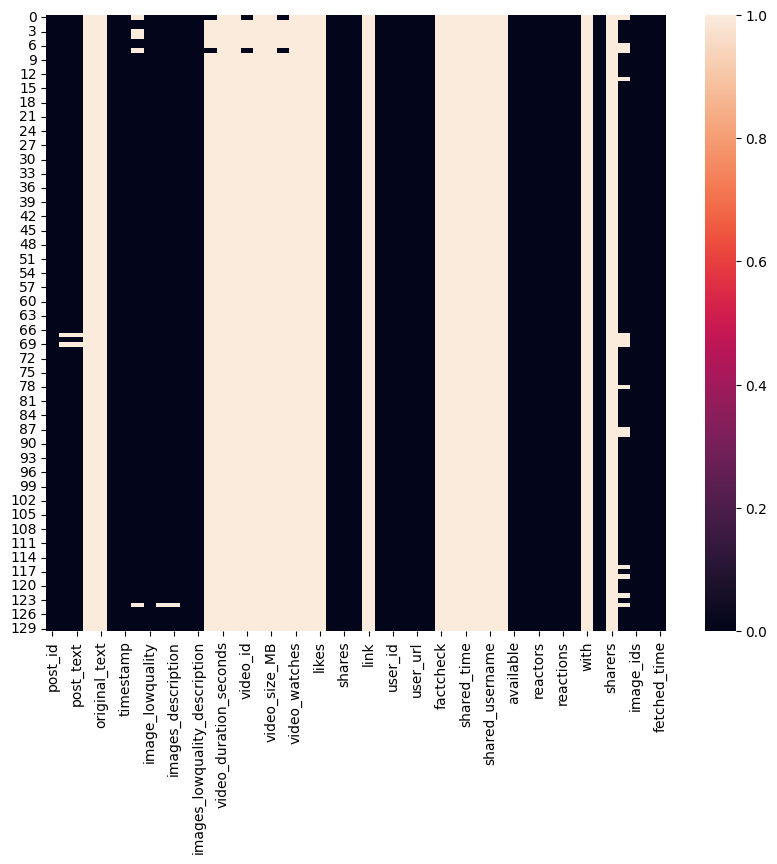

In [4]:
fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(post_df_full.isna())

In [5]:
for col in post_df_full.columns:
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100, 2)
    
    if miss_per > 90:
        post_df_full.drop(col, axis=1, inplace=True)
        print(f"{col} đã bị xóa vì có {miss_per}% dữ liệu bị mất.")


shared_text đã bị xóa vì có 100.0% dữ liệu bị mất.
original_text đã bị xóa vì có 100.0% dữ liệu bị mất.
video đã bị xóa vì có 98.46% dữ liệu bị mất.
video_duration_seconds đã bị xóa vì có 100.0% dữ liệu bị mất.
video_height đã bị xóa vì có 100.0% dữ liệu bị mất.
video_id đã bị xóa vì có 98.46% dữ liệu bị mất.
video_quality đã bị xóa vì có 100.0% dữ liệu bị mất.
video_size_MB đã bị xóa vì có 100.0% dữ liệu bị mất.
video_thumbnail đã bị xóa vì có 98.46% dữ liệu bị mất.
video_watches đã bị xóa vì có 100.0% dữ liệu bị mất.
video_width đã bị xóa vì có 100.0% dữ liệu bị mất.
likes đã bị xóa vì có 100.0% dữ liệu bị mất.
link đã bị xóa vì có 100.0% dữ liệu bị mất.
factcheck đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_post_id đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_time đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_user_id đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_username đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_post_url đã bị xóa vì có 100.0% dữ liệu bị mất.
with đã bị xóa vì

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Statistics and Visualization


In [17]:
post_df_full

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
0,733451988821373,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,2023-11-11 08:50:06,1699667406,NaN,https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,[],[],['https://scontent.fhan2-4.fna.fbcdn.net/v/t15...,...,"[{'comment_id': '849551596902680', 'comment_ur...",[],https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 10524, 'yêu thích': 607, 'haha': 150...",27027,201387753325011,NaN,[],False,2023-11-15 10:12:38.986
1,733109305522308,|BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN...,|BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN...,2023-11-10 20:01:56,1699621316,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về văn bản cho biết 'BGVN...",['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '867705468222647', 'comment_ur...","[{'name': 'Thanh Thảo', 'link': 'https://faceb...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 26, 'yêu thích': 12, 'wow': 1}",39,201387753325011,7.331093e+14,"['733109285522310', '201387753325011']",False,2023-11-15 10:12:50.518
2,732388768927695,Chưa làm được tích sự gì nhưng vừa đến đã ăn l...,Chưa làm được tích sự gì nhưng vừa đến đã ăn l...,2023-11-09 10:46:39,1699501599,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình minh họa về văn bản cho biết ...",['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '315620721225362', 'comment_ur...","[{'name': 'Ngọc Diệp', 'link': 'https://facebo...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 472, 'yêu thích': 7, 'haha': 559, 'w...",1041,201387753325011,7.323887e+14,['732388745594364'],False,2023-11-15 10:12:54.885
3,731920548974517,Một phút thật lòng nào :),Một phút thật lòng nào :),2023-11-08 18:46:30,1699443990,NaN,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,[],[],['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '1011347420111090', 'comment_u...","[{'name': 'Hiếu Vũ', 'link': 'https://facebook...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 1939, 'yêu thích': 1195, 'haha': 188...",3426,201387753325011,7.319205e+14,['731920535641185'],False,2023-11-15 10:13:26.518
4,731844392315466,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,2023-11-08 15:05:21,1699430721,NaN,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,[],[],['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '1165768371050560', 'comment_u...","[{'name': 'Kevin Đức Cường.', 'link': 'https:/...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 283, 'yêu thích': 3, 'haha': 422, 'w...",720,201387753325011,7.318444e+14,['731844378982134'],False,2023-11-15 10:13:57.357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2455989184531512,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,2021-11-06 21:04:14,1636207454,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,['Không có mô tả ảnh.'],['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '2455999847863779', 'comment_u...",[],https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 319, 'yêu thích': 6, 'haha': 407, 't...",745,201387753325011,2.455989e+15,['2455988857864878'],False,2023-11-15 10:57:34.375
126,2452635751533522,Xinhhhh,Xinhhhh,2021-11-02 20:47:51,1635860871,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.n

In [18]:
post_df_full["comments_full"]

0      [{'comment_id': '849551596902680', 'comment_ur...
1      [{'comment_id': '867705468222647', 'comment_ur...
2      [{'comment_id': '315620721225362', 'comment_ur...
3      [{'comment_id': '1011347420111090', 'comment_u...
4      [{'comment_id': '1165768371050560', 'comment_u...
                             ...                        
125    [{'comment_id': '2455999847863779', 'comment_u...
126    [{'comment_id': '2452668528196911', 'comment_u...
127    [{'comment_id': '2048804838633207', 'comment_u...
128    [{'comment_id': '2439411446189286', 'comment_u...
129    [{'comment_id': '2437741633022934', 'comment_u...
Name: comments_full, Length: 130, dtype: object

### Mean number of interactions

In [19]:
post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count','shares','comments']].sum()

,reaction_count,shares,comments
time,,,
2021,109940,1580,2678
2022,509581,6168,21009
2023,258563,4954,10414


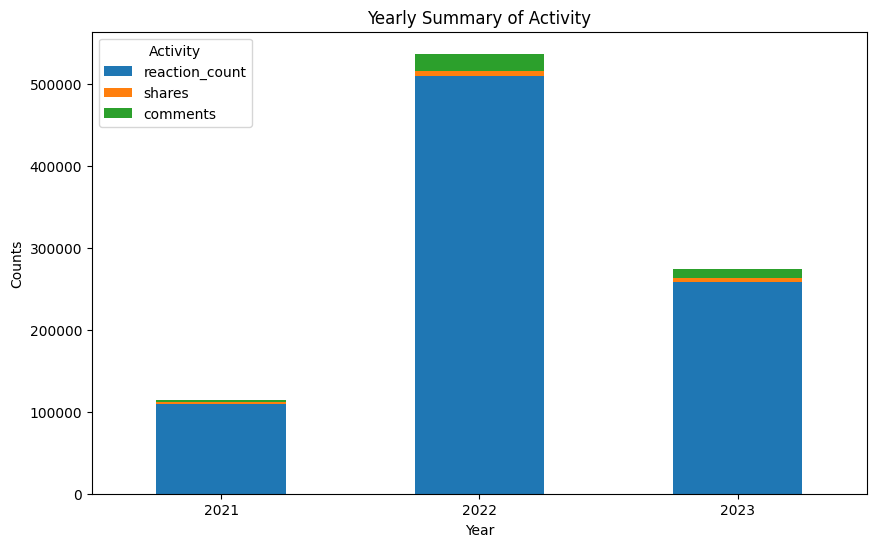

In [20]:
yearly_summary = post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count', 'shares', 'comments']].sum()

# Plot the data as a stacked bar chart
yearly_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Summary of Activity')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Activity', loc='upper left')

plt.show()

In [21]:
start_date = post_df_full["time"].min().strftime('%Y-%m-%d')
end_date = post_df_full["time"].max().strftime('%Y-%m-%d')

print(f"Mốc thời gian thu thập từ {start_date} đến {end_date}")

Mốc thời gian thu thập từ 2021-10-15 đến 2023-11-11


In [22]:
print("Tổng reaction :",post_df_full["reaction_count"].sum())


Tổng reaction : 878084


In [23]:
average_reaction = round(post_df_full["reaction_count"].mean(), 2)
print("Số reaction trung bình:", average_reaction)

Số reaction trung bình: 6754.49


In [16]:
print("Tổng shares :",post_df_full["shares"].sum())

Tổng shares : 12702


In [15]:
average_shares = round(post_df_full["shares"].mean(), 2)
print("Số shares trung bình mỗi bài post:", average_shares)

Số shares trung bình mỗi bài post: 97.71


In [17]:
print("Tổng số Comments :",post_df_full["comments"].sum())

Tổng số Comments : 34101


In [18]:
average_cmt = round(post_df_full["comments"].mean(), 2)
print("Số comments trung bình mỗi bài post:", average_cmt)

Số comments trung bình mỗi bài post: 262.32


### Daily reactions

In [9]:

post_df_full1=post_df_full
post_df_full1[['post_id','time', 'reactions','reaction_count']]

,post_id,time,reactions,reaction_count
0,733451988821373,2023-11-11 08:50:06,"{'thích': 10524, 'yêu thích': 607, 'haha': 150...",27027
1,733109305522308,2023-11-10 20:01:56,"{'thích': 26, 'yêu thích': 12, 'wow': 1}",39
2,732388768927695,2023-11-09 10:46:39,"{'thích': 472, 'yêu thích': 7, 'haha': 559, 'w...",1041
3,731920548974517,2023-11-08 18:46:30,"{'thích': 1939, 'yêu thích': 1195, 'haha': 188...",3426
4,731844392315466,2023-11-08 15:05:21,"{'thích': 283, 'yêu thích': 3, 'haha': 422, 'w...",720
...,...,...,...,...
125,2455989184531512,2021-11-06 21:04:14,"{'thích': 319, 'yêu thích': 6, 'haha': 407, 't...",745
126,2452635751533522,2021-11-02 20:47:51,"{'thích': 2460, 'yêu thích': 1124, 'haha': 31,...",3685
127,2448957895234641,2021-10-29 10:57:41,"{'thích': 1100, 'yêu thích': 25, 'haha': 1204,...",2376
128,2439249156205515,2021-10-17 17:10:41,"{'thích': 352, 'yêu thích': 15, 'haha': 200, '...",578


In [29]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])

In [30]:
y_rea = post_df_full.groupby(post_df_full["time"].dt.year)['reaction_count'].sum()
y_rea

time
2021    109940
2022    509581
2023    258563
Name: reaction_count, dtype: int64

In [32]:
sizes = y_rea.values 
labels = y_rea.index

Text(0, 0.5, 'Reaction_count')

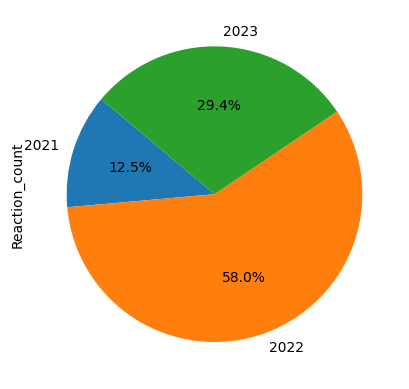

In [33]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Reaction_count")

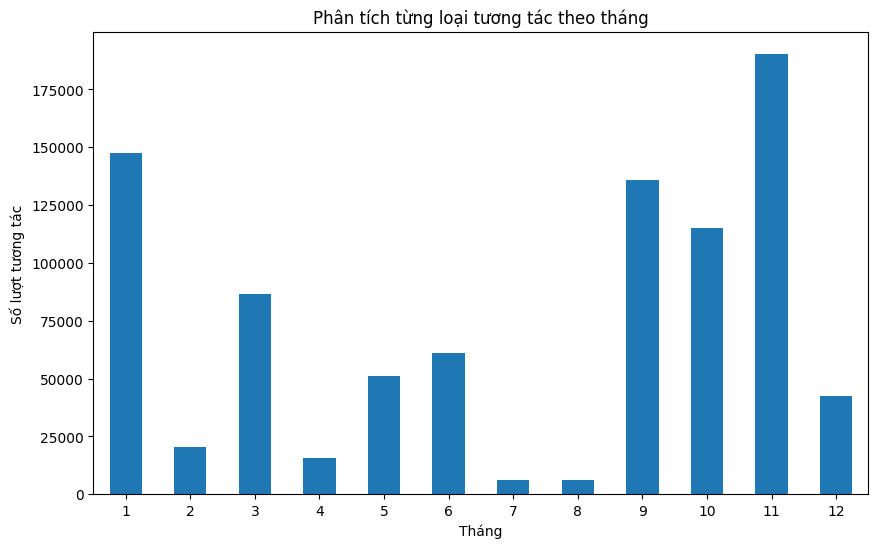

In [44]:
t_sha = post_df_full.groupby(post_df_full["time"].dt.month)['reaction_count'].sum()
t_sha.plot(kind = "bar",figsize = (10,6))
plt.title('Phân tích từng loại tương tác theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượt tương tác')
plt.xticks(rotation=0)  
plt.show()

### Categorize each emotion


In [10]:
# chuyển kiểu
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\1935438685.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


In [12]:
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)

for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,10524.0,607.0,15041.0,128.0,642.0,2.0,83.0,2397,3933,27027
1,|BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN...,26.0,12.0,0.0,1.0,0.0,0.0,0.0,3,6,39
2,Chưa làm được tích sự gì nhưng vừa đến đã ăn l...,472.0,7.0,559.0,1.0,2.0,0.0,0.0,2,8,1041
3,Một phút thật lòng nào :),1939.0,1195.0,188.0,1.0,3.0,0.0,100.0,21,346,3426
4,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,283.0,3.0,422.0,4.0,8.0,0.0,0.0,8,25,720
...,...,...,...,...,...,...,...,...,...,...,...
125,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,319.0,6.0,407.0,0.0,10.0,0.0,3.0,6,12,745
126,Xinhhhh,2460.0,1124.0,31.0,16.0,6.0,1.0,47.0,350,112,3685
127,Nghe nói là chơi thân với nhau sẽ trở nên giốn...,1100.0,25.0,1204.0,3.0,35.0,1.0,8.0,27,122,2376
128,Ở nhà nghỉ dịch cứ như thế này\nBảo sao trọng ...,352.0,15.0,200.0,1.0,6.0,1.0,3.0,8,10,578


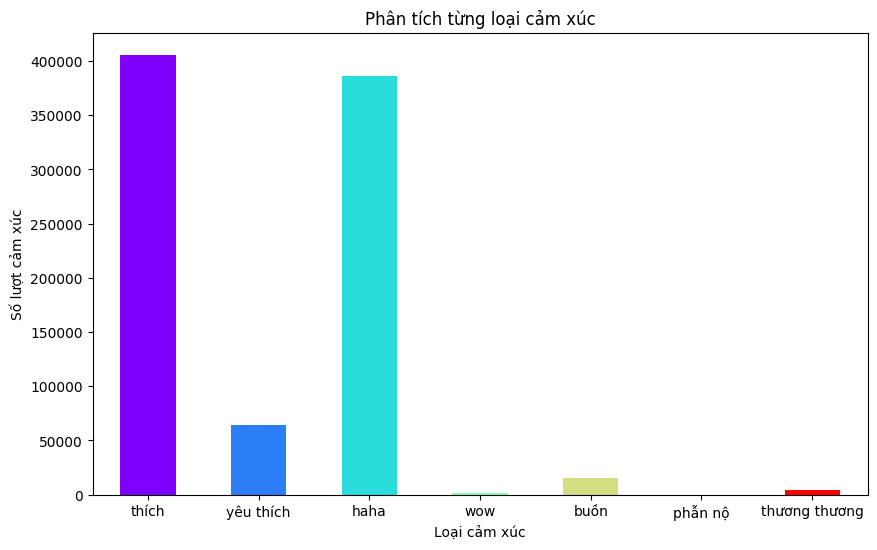

In [13]:
emotions_data = post_df_full_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']]
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(emotions_data.columns)))

emotions_data.sum().plot(kind='bar', figsize=(10, 6),color=rainbow_colors)
plt.title('Phân tích từng loại cảm xúc')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượt cảm xúc')
plt.xticks(rotation=0)  
plt.show()

In [38]:
x  = round(post_df_full_with_reactions["haha"].sum() / post_df_full["reaction_count"].sum(),4) * 100
print("Số lượt tương tác Haha chiếm : " + str(x) + "%, chứng tỏ nội dung bài viết thường mang chủ đề vui vẻ!")

Số lượt tương tác Haha chiếm : 43.96%, chứng tỏ nội dung bài viết thường mang chủ đề vui vẻ!


C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\4260507355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data['time'] = pd.to_datetime(emotions_data['time'])
C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\4260507355.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data.fillna(0, inplace=True)  # Replace NaN with 0, assuming missing values mean no reactions


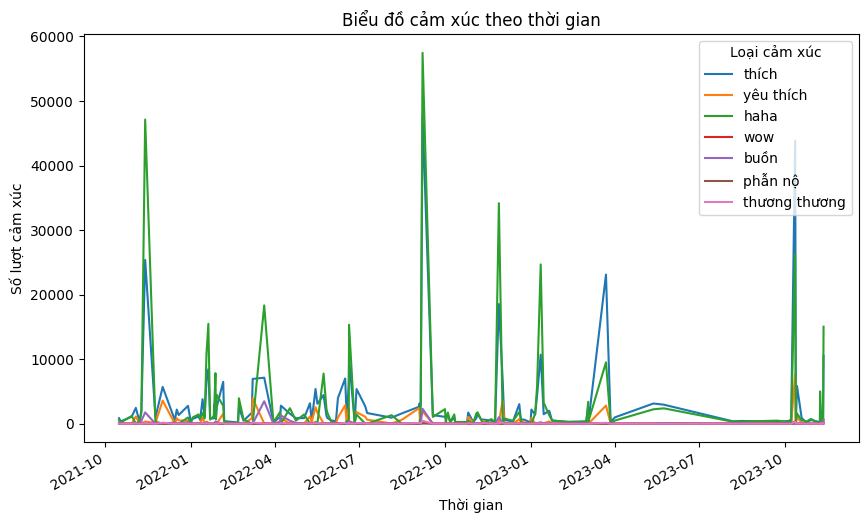

In [14]:
emotions_data = post_df_full_with_reactions[['time', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']]

emotions_data['time'] = pd.to_datetime(emotions_data['time'])

emotions_data.set_index('time', inplace=True)

emotions_data.fillna(0, inplace=True)  # Replace NaN with 0

emotions_data.plot(figsize=(10, 6))
plt.title('Biểu đồ cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt cảm xúc')
plt.legend(title='Loại cảm xúc')

plt.show()

#### Correlate posts over time

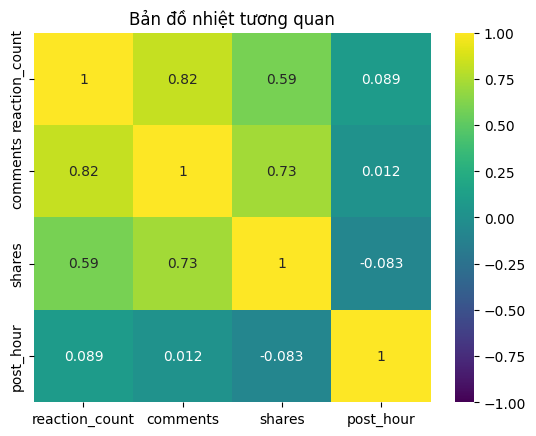

In [61]:
corr = post_df_full[['reaction_count', 'comments', 'shares', 'post_hour']].corr()

sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)

plt.title('Bản đồ nhiệt tương quan')
plt.show()

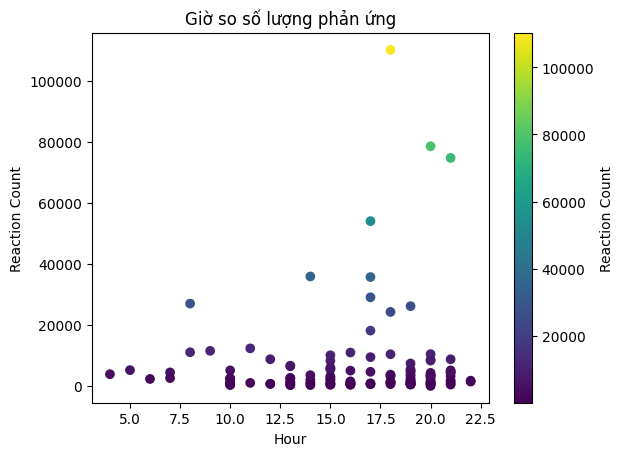

In [62]:
plt.scatter(post_df_full['post_hour'], post_df_full['reaction_count'], c=post_df_full['reaction_count'], cmap='viridis')
plt.title('Giờ so số lượng phản ứng')
plt.xlabel('Hour')
plt.ylabel('Reaction Count')
plt.colorbar(label='Reaction Count') 

plt.show()

### Posts with the max,min interactions

In [19]:
print("Số lượt tương tác nhiều nhất :",post_df_full["reaction_count"].max())

Số lượt tương tác nhiều nhất : 110184


In [20]:


# Find the row with the maximum reaction_count
max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

# Convert the dictionary to a formatted string with line breaks
formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions: \n{formatted_reactions}")

Post Id: 2708273079303120
Post Text: Ghét của nào trời trao của đấy
Time: 2022-09-06 18:30:30
Reactions: 
thích: 47712
yêu thích: 1907
haha: 57465
wow: 299
thương thương: 454
buồn: 2313
phẫn nộ: 34


In [46]:
print("Số lượt tương tác ít nhất :",post_df_full["reaction_count"].min())

Số lượt tương tác ít nhất : 39


In [47]:

max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions:\n{formatted_reactions}")

Post Id: 733109305522308
Post Text: |BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN!!|

Mới nghe nói EverJoy sắp trình làng bộ game Doraemon được chính chủ bản quyền Fujio bên Nhật cấp phép, chắc chắn sẽ tạo ra một cơn sốt lớn.
Có thể chúng ta đã từng nghe qua đến cái tên EverJoy. EverJoy Publishing là công ty hoạt động trong lĩnh vực giải trí tương tác, đầu tư vào các thương hiệu hàng đầu về giải trí như Board Game VN (thương hiệu phát hành và phân phối board game lớn nhất Việt Nam), hay Lớp Học Mật Ngữ (thương hiệu truyện tranh dành cho tuổi teen số 1 tại Việt Nam). Các sản phẩm và giải pháp của EverJoy đã mang niềm vui đến hàng triệu khách hàng, đáp ứng nhu cầu giải trí tại gia đình cũng như tại công sở.
Trong năm 2023, ngoài việc phát triển các board game truyền thống, thương hiệu phát hành Board Game VN đã kết hợp với các IP nổi tiếng toàn cầu, đặc biệt có Thám tử lừng danh Conan và Doraemon. Bên cạnh phát triển thị trường board game tại Việt Nam qua các chiến dịch marketing bài bả

##### Number of posts with likes greater than 10k

In [45]:
post_df_full[post_df_full["reaction_count"] >= 10000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]


,post_id,post_text,time,reactions,reaction_count,shares,comments
0,733451988821373,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,2023-11-11 08:50:06,"{'thích': 10524, 'yêu thích': 607, 'haha': 150...",27027,2397,3933
14,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43874, 'yêu thích': 7652, 'haha': 26...",78610,916,2014
25,595757249257515,Cách để làm tan đi cái nóng lúc này,2023-03-22 17:23:32,"{'thích': 23111, 'yêu thích': 2814, 'haha': 95...",35731,359,878
33,2828329883964105,Sự thật mất lòng :)),2023-01-11 14:52:32,"{'thích': 10712, 'yêu thích': 205, 'haha': 246...",35913,351,822
34,2824884297641997,Độc lạ Tokyo :))\n\nẢnh: Khôi Dương,2023-01-07 18:21:46,"{'thích': 4429, 'yêu thích': 35, 'haha': 5860,...",10429,43,122
44,2789942831136144,89 năm ngày sinh cố họa sĩ Fujiko F. Fujio\n01...,2022-12-01 20:05:23,"{'thích': 6630, 'yêu thích': 3577, 'haha': 10,...",10460,78,51
45,2786271731503254,Nuôi ăn miễn phí rồi để nó tìm mẹ trong thùng ...,2022-11-27 17:04:17,"{'thích': 18542, 'yêu thích': 228, 'haha': 341...",54060,331,1510
64,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47712, 'yêu thích': 1907, 'haha': 57...",110184,921,8125
75,2643960622401033,Đây mới là chồn này🙄,2022-06-19 19:51:33,"{'thích': 10099, 'yêu thích': 234, 'haha': 153...",26191,181,958
78,2640432139420548,Happy Birthday Chaien 15/06\n\nMặc dù khá cục ...,2022-06-15 15:47:58,"{'thích': 7013, 'yêu thích': 2852, 'haha': 81,...",10083,52,397


### Posts with the max,min shares

In [49]:
y_sha = post_df_full.groupby(post_df_full["time"].dt.year)['shares'].sum()
y_sha

time
2021    1580
2022    6168
2023    4954
Name: shares, dtype: int64

Text(0, 0.5, 'Shares')

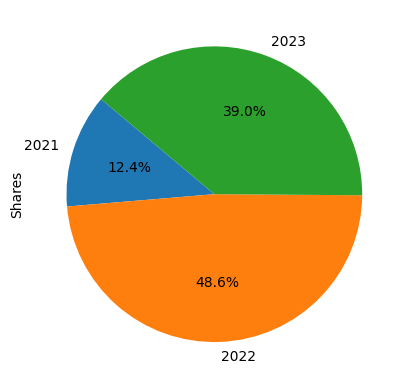

In [50]:
sizes = y_sha.values
labels = y_sha.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Shares")

In [46]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 733451988821373
Post Text: Phim hoạt hình Đô rê mon từng được lồng tiếng Bắc và chiếu trên VTV1 😅
Time: 2023-11-11 08:50:06
Shares: 2397


In [47]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 681378290695410
Post Text: Cao thủ gặp thách đấu :))))
Cre: Gia đình ngộ
Time: 2023-08-15 14:02:41
Shares: 1


##### Number of articles with shares greater than 500

In [53]:
post_df_full[post_df_full["shares"] >= 500][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

,post_id,post_text,time,reactions,reaction_count,shares,comments
0,733451988821373,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,2023-11-11 08:50:06,"{'thích': 10524, 'yêu thích': 607, 'haha': 150...",27027,2397,3933
14,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43874, 'yêu thích': 7652, 'haha': 26...",78610,916,2014
64,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47712, 'yêu thích': 1907, 'haha': 57...",110184,921,8125
68,2705211556275939,"🎉03.09.2022🎉\n\nCHÚC MỪNG SINH NHẬT DORAEMON, ...",2022-09-03 05:44:43,"{'thích': 2644, 'yêu thích': 2426, 'haha': 20,...",5218,509,539


### Post with tha max,min comments

In [54]:
y_com = post_df_full.groupby(post_df_full["time"].dt.year)['comments'].sum()
y_com

time
2021     2678
2022    21009
2023    10414
Name: comments, dtype: int64

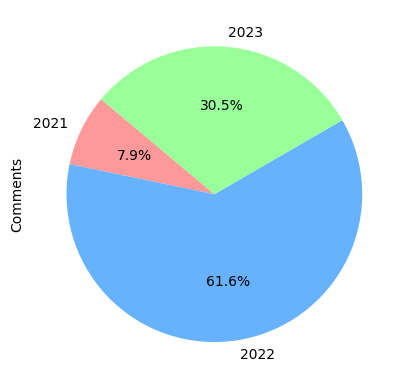

In [55]:
# Assuming sizes and labels are your data
sizes = y_com.values
labels = y_com.index

# Choose a pastel color palette
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plot the pie chart with the chosen color palette
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.ylabel("Comments")

plt.show()

In [56]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2708273079303120
Post Text: Ghét của nào trời trao của đấy
Time: 2022-09-06 18:30:30
Comments: 8125


In [57]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2575499035913859
Post Text: Xuka kiểu: Keep My Name Out Your F***king Head
Time: 2022-03-30 15:41:39
Comments: 1


##### Number of articles with comments greater than 1000

In [48]:
post_df_full[post_df_full["comments"] >= 1000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

,post_id,post_text,time,reactions,reaction_count,shares,comments
0,733451988821373,Phim hoạt hình Đô rê mon từng được lồng tiếng ...,2023-11-11 08:50:06,"{'thích': 10524, 'yêu thích': 607, 'haha': 150...",27027,2397,3933
14,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43874, 'yêu thích': 7652, 'haha': 26...",78610,916,2014
41,2807155129414914,Độc là Vũng Tàu :)))\n\nẢnh: Giang Hoàng Đan,2022-12-19 15:05:34,"{'thích': 3036, 'yêu thích': 721, 'haha': 1820...",5700,128,1153
45,2786271731503254,Nuôi ăn miễn phí rồi để nó tìm mẹ trong thùng ...,2022-11-27 17:04:17,"{'thích': 18542, 'yêu thích': 228, 'haha': 341...",54060,331,1510
64,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47712, 'yêu thích': 1907, 'haha': 57...",110184,921,8125
123,2461153630681734,Là ma nhưng xem phim ma vẫn sợ :)),2021-11-12 21:48:30,"{'thích': 25386, 'yêu thích': 332, 'haha': 471...",74790,436,1304


### Articles posted by day of the week

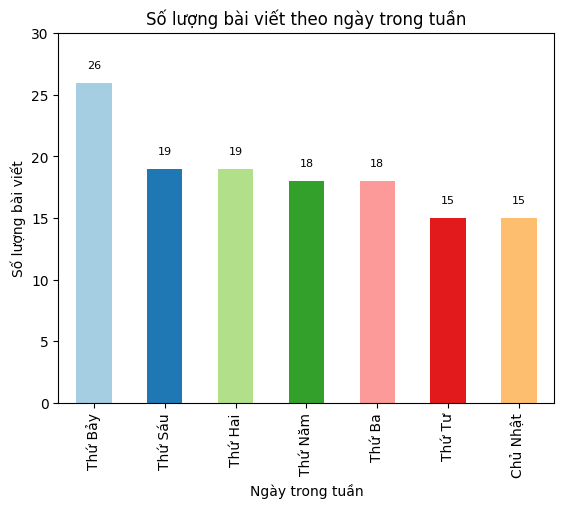

In [43]:
day_name_mapping = {
    'Monday': 'Thứ Hai',
    'Tuesday': 'Thứ Ba',
    'Wednesday': 'Thứ Tư',
    'Thursday': 'Thứ Năm',
    'Friday': 'Thứ Sáu',
    'Saturday': 'Thứ Bảy',
    'Sunday': 'Chủ Nhật'
}

post_df_full['week_day'] = post_df_full['time'].apply(lambda x: day_name_mapping[x.strftime('%A')])

day_counts = post_df_full['week_day'].value_counts()

colors = cm.Paired(np.arange(len(day_counts)))
ax = day_counts.plot(kind='bar', color=colors)

for i, v in enumerate(day_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.ylim(0, 30)

plt.title('Số lượng bài viết theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng bài viết')
plt.show()

### Regular posting timestamps

In [50]:
post_df_full['post_hour'] = post_df_full['time'].dt.hour
x_h = post_df_full.groupby('post_hour').size()
x_h

post_hour
4      1
5      1
6      1
7      2
8      2
9      1
10     9
11     2
12     3
13    10
14     6
15    14
16    10
17     9
18    11
19    18
20    17
21    11
22     2
dtype: int64

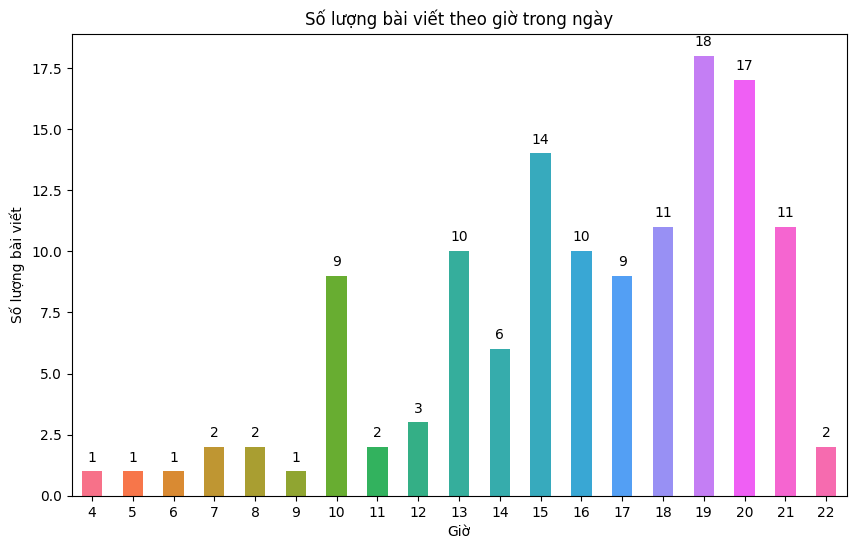

In [51]:
plt.figure(figsize=(10, 6))
bright_palette = sns.color_palette("husl", n_colors=len(x_h))

ax = x_h.plot(kind='bar',color = bright_palette)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Số lượng bài viết theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài viết')
plt.xticks(rotation=0) 

plt.show()

##### Time frame with the most abd fewest posts

In [52]:
max_hour = x_h.idxmax()
max_post_count = x_h.max()

print(f"Thời gian có nhiều bài post nhất vào khoảng:{max_hour} giờ,số lượng: {max_post_count} bài post")


Thời gian có nhiều bài post nhất vào khoảng:19 giờ,số lượng: 18 bài post


In [53]:
min_hour = x_h.idxmin()
min_post_count = x_h.min()

print(f"Thời gian có ít bài post nhất vào khoảng: {min_hour} giờ,số lượng: {min_post_count} bài post")


Thời gian có ít bài post nhất vào khoảng: 4 giờ,số lượng: 1 bài post


### Average number of interactions per hour

In [54]:
x_r = post_df_full.groupby("post_hour")["reaction_count"].sum()
x_r

post_hour
4       3882
5       5218
6       2325
7       7089
8      38107
9      11540
10     16383
11     13382
12     10224
13     24958
14     43860
15     49783
16     22783
17    153407
18    160977
19     68402
20    132430
21    110115
22      3219
Name: reaction_count, dtype: int64

In [55]:
#How many interactions does a post get on average?
x_a = x_r // x_h
x_a

post_hour
4      3882
5      5218
6      2325
7      3544
8     19053
9     11540
10     1820
11     6691
12     3408
13     2495
14     7310
15     3555
16     2278
17    17045
18    14634
19     3800
20     7790
21    10010
22     1609
dtype: int64

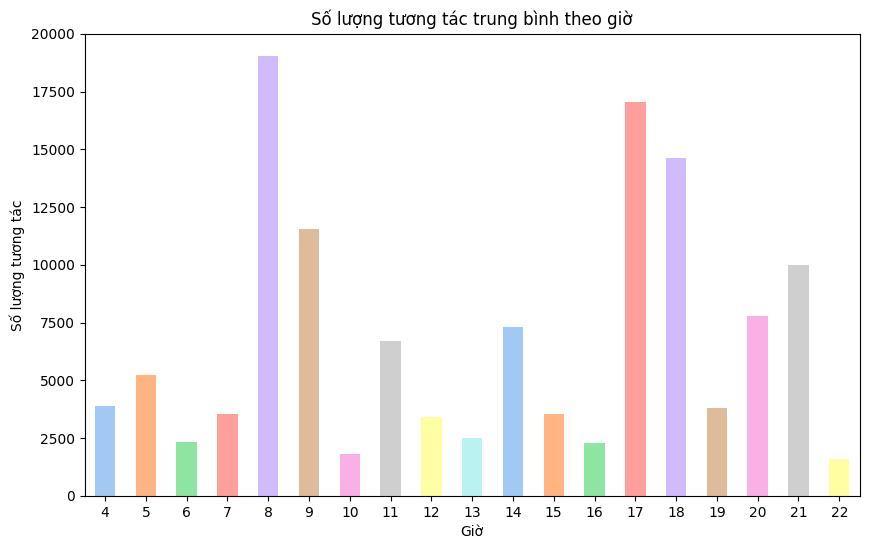

In [56]:

plt.figure(figsize=(10, 6))
pastel_palette = sns.color_palette("pastel", n_colors=len(x_a))

x_a.plot(kind='bar',color = pastel_palette)
plt.title('Số lượng tương tác trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng tương tác')
plt.xticks(rotation=0) 

plt.show()

In [57]:
max_hour = x_a.idxmax()
max_post_count = x_a.max()

print(f"Lượt tương tác trung bình của bài viết cao nhất vào lúc:{max_hour} giờ,số lượng: {max_post_count} tương tác trên 1 bài post")

Lượt tương tác trung bình của bài viết cao nhất vào lúc:8 giờ,số lượng: 19053 tương tác trên 1 bài post


In [58]:
max_hour = x_a.idxmin()
max_post_count = x_a.min()

print(f"Lượt tương tác trung bình của bài viết thấp nhất vào lúc:{max_hour} giờ,số lượng: {max_post_count} tương tác trên 1 bài post")

Lượt tương tác trung bình của bài viết thấp nhất vào lúc:22 giờ,số lượng: 1609 tương tác trên 1 bài post


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Analyze keywords in the article

### Number of articles containing the keyword "Doraemon"

In [72]:
a = post_df_full_with_reactions['post_text'].tolist()
print("Tổng số bài viết:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Doraemon" in i:
        res.append(i)

print(len(res), "bài viết chứa từ khóa 'Doraemon'")


Tổng số bài viết: 130
19 bài viết chứa từ khóa 'Doraemon'


### Number of articles containing the keyword "Nobita"

In [73]:
a = post_df_full_with_reactions['post_text'].tolist()
print("Tổng số bài viết:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Nobita" in i:
        res.append(i)

print(len(res), "bài viết chứa từ khóa 'Nobita'")

Tổng số bài viết: 130
10 bài viết chứa từ khóa 'Nobita'


### Wordcloud 

In [74]:
df_text = post_df_full[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,733451988821373,Phim hoạt hình Đô rê mon từng được lồng tiếng ...
1,733109305522308,|BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN...
2,732388768927695,Chưa làm được tích sự gì nhưng vừa đến đã ăn l...
3,731920548974517,Một phút thật lòng nào :)
4,731844392315466,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...
...,...,...
125,2455989184531512,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S
126,2452635751533522,Xinhhhh
127,2448957895234641,Nghe nói là chơi thân với nhau sẽ trở nên giốn...
128,2439249156205515,Ở nhà nghỉ dịch cứ như thế này\nBảo sao trọng ...


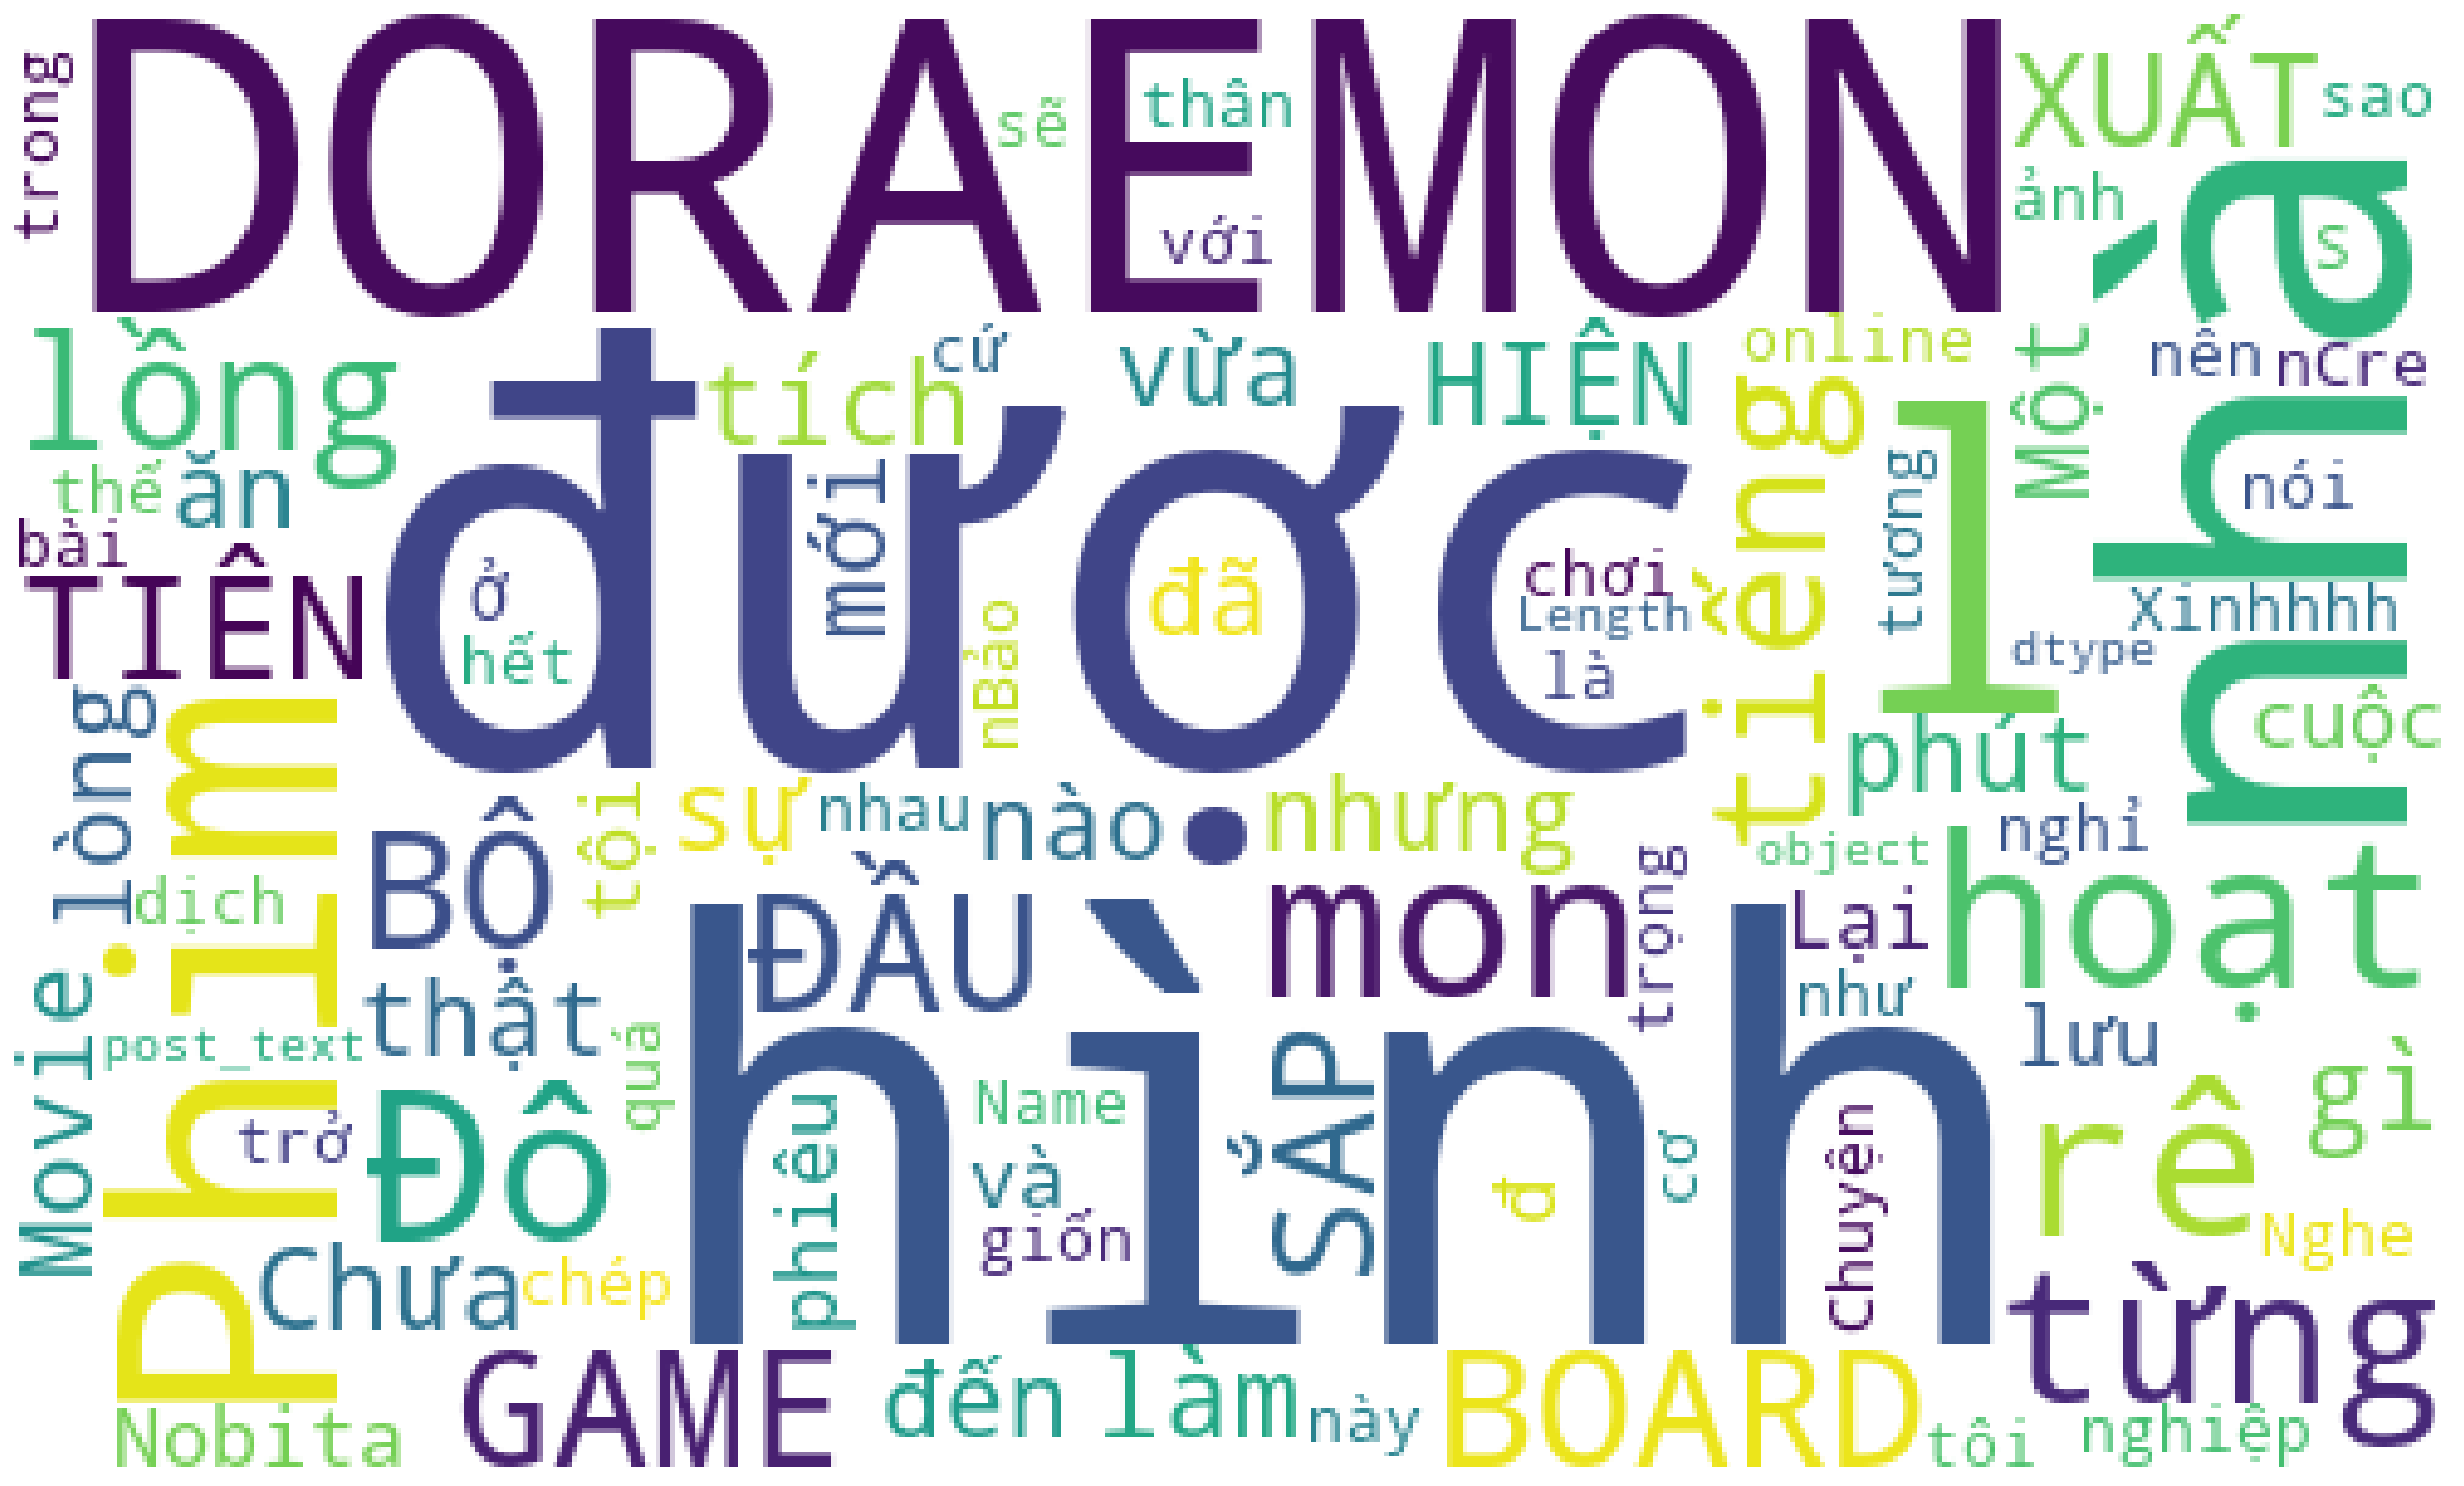

In [75]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Keyword

In [76]:
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

#### Read file and hendle

In [78]:
post_df_full_with_reactions['post_text'] = post_df_full_with_reactions['post_text'].fillna("")  
text = ""
for i in post_df_full_with_reactions['post_text']:
    if isinstance(i, str):
        text = text + i + "\n"

In [79]:
text

'Phim hoạt hình Đô rê mon từng được lồng tiếng Bắc và chiếu trên VTV1 😅\n|BỘ BOARD GAME DORAEMON ĐẦU TIÊN SẮP XUẤT HIỆN!!|\n\nMới nghe nói EverJoy sắp trình làng bộ game Doraemon được chính chủ bản quyền Fujio bên Nhật cấp phép, chắc chắn sẽ tạo ra một cơn sốt lớn.\nCó thể chúng ta đã từng nghe qua đến cái tên EverJoy. EverJoy Publishing là công ty hoạt động trong lĩnh vực giải trí tương tác, đầu tư vào các thương hiệu hàng đầu về giải trí như Board Game VN (thương hiệu phát hành và phân phối board game lớn nhất Việt Nam), hay Lớp Học Mật Ngữ (thương hiệu truyện tranh dành cho tuổi teen số 1 tại Việt Nam). Các sản phẩm và giải pháp của EverJoy đã mang niềm vui đến hàng triệu khách hàng, đáp ứng nhu cầu giải trí tại gia đình cũng như tại công sở.\nTrong năm 2023, ngoài việc phát triển các board game truyền thống, thương hiệu phát hành Board Game VN đã kết hợp với các IP nổi tiếng toàn cầu, đặc biệt có Thám tử lừng danh Conan và Doraemon. Bên cạnh phát triển thị trường board game tại Việ

In [80]:
fi = open("stop_word.inp",encoding="utf-8")
s = fi.read()
s = s.replace("'","")
s = s.split()

In [81]:
for i in s:
  text = text.replace(i,"")

In [82]:
# tìm số từ xuất hiện trong tài liệu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

1694
57


In [83]:
fi = open("stop_word2.inp",encoding="utf-8")
ss = fi.read()
ss = ss.replace("'","")
ss = ss.split()
print(ss)

['nhưng,', 'trả,', 'nhóm,', 'vậy,', 'liên_kết,', 'thẩy,', 'cấp,', 'vừa,', 'ơ,', 'trước,', 'mọi,', 'nhận,', 'lời,', 'và,', 'amen,', 'chậc,', 'cách,', 'trên,', 'bài,', 'ngôi,', 'trệt,', 'nói,', 'hai,', 'buổi,', 'thấp,', 'loài,', 'tạo,', 'thốc,', 'vụt,', 'không,', 'thường,', 'chính,', 'cùng,', 'điểm,', 'bệt,', 'nếu,', 'ái,', 'oái,', 'bản,', 'giảm,', 'bển,', 'giữa,', 'bông,', 'sắp,', 'giờ,', 'ngay,', 'cái,', 'khó,', 'thế,', 'bỗng,', 'tránh,', 'rõ,', 'thuần,', 'phía,', 'bên,', 'hoa,', 'chú,', 'tới,', 'bước,', 'bà,', 'chỉ,', 'ờ,', 'chung,', 'nghĩ,', 'tỉnh,', 'tin,', 'rằng,', 'ngày,', 'căn,', 'gần,', 'ngoải,', 'sáng,', 'nóc,', 'mối,', 'được,', 'càng,', 'rồi,', 'chị,', 'cuộc,', 'nặng,', 'con,', 'sang,', 'bức,', 'nguồn,', 'giữ,', 'loại,', 'điều,', 'nhất,', 'phót,', 'bớ,', 'thoắt,', 'ngoài,', 'cần,', 'từng,', 'lúc,', 'bằng,', 'vẫn,', 'cơ,', 'này,', 'ồ,', 'thực_vật,', 'tấn,', 'ơi,', 'đúng,', 'dạ,', 'dễ,', 'bị,', 'vài,', 'bác,', 'ủa,', 'thỏm,', 'cũng,', 'nền,', 'nhằm,', 'ngồi,', 'xuống,', 'ấy,', '

In [84]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in ss:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Phim': 2, 'hot': 5, 'Đ': 4, 'rê': 4, 'mon': 3, 'ng': 36, 'lng': 2, 'tiếng': 5, 'Bắc': 3, 'v': 32, 'chiếu': 1, 'VTV1': 1, '😅': 1, '|BỘ': 1, 'BOARD': 1, 'GAME': 1, 'DORAEMON': 1, 'ĐẦU': 1, 'TIÊN': 1, 'SẮP': 1, 'XUẤT': 1, 'HIỆN!!|': 1, 'Mi': 2, 'EverJoy': 6, 'trình': 2, 'gme': 7, 'Doon': 17, 'chủ': 2, 'ền': 1, 'Fujio': 4, 'Nhật': 4, 'phép,': 1, 'chắn': 2, 'cn': 5, 't': 15, '': 17, 'Có': 3, 'c': 42, 'Publishing': 1, 'ty': 1, 'động': 3, 'lĩnh': 1, 'vực': 1, 'giải': 4, 'trí': 3, 'tưng': 4, 'tc,': 2, 'đ': 15, 'tư': 2, 'thưng': 4, 'hiệu': 4, 'hng': 2, 'Bord': 2, 'Gme': 2, 'VN': 2, '(thưng': 2, 'pht': 9, 'hnh': 6, 'phân': 1, 'ph': 3, 'bord': 6, 'Việt': 8, 'Nm),': 1, 'Lp': 1, 'Học': 1, 'Mật': 1, 'Ngữ': 1, 'truyện': 6, 'tnh': 4, 'teen': 1, '1': 4, 'Nm)': 1, 'Cc': 1, 'sản': 2, 'phẩm': 3, 'php': 1, 'niềm': 1, 'vui': 2, 'triệu': 1, 'h': 10, 'hng,': 1, 'đp': 1, 'nhu': 4, 'gi': 4, 'đình': 3, 's': 7, 'Trong': 3, '2023,': 1, 'ngoi': 3, 'triển': 3, 'truyền': 3, 'thống,': 1, 'kết': 3, 'hợp': 2, 'IP': 1,

In [85]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in s:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Phim': 1.7404661748405046, 'hot': 0.3053816495511819, 'Đ': 1.4039939382192914, 'rê': 1.209837923778334, 'mon': 0.3794896217049037, 'ng': 0.17185025692665923, 'lng': 0.9075570519054004, 'tiếng': 0.8649974374866045, 'Bắc': 1.8458266904983307, 'v': 0.5465437063680699, 'chiếu': 4.04305126783455, 'VTV1': 4.04305126783455, '😅': 4.04305126783455, '|BỘ': 4.04305126783455, 'BOARD': 4.04305126783455, 'GAME': 4.04305126783455, 'DORAEMON': 4.04305126783455, 'ĐẦU': 4.04305126783455, 'TIÊN': 4.04305126783455, 'SẮP': 4.04305126783455, 'XUẤT': 4.04305126783455, 'HIỆN!!|': 4.04305126783455, 'Mi': 1.0473189942805592, 'EverJoy': 2.097141118779237, 'trình': 1.6451559950361796, 'gme': 0.9985288301111273, 'Doon': 0.8649974374866045, 'chủ': 2.6567569067146595, 'ền': 4.04305126783455, 'Fujio': 2.097141118779237, 'Nhật': 1.33500106673234, 'phép,': 4.04305126783455, 'chắn': 1.55814461804655, 'cn': 0.25886163391628897, 't': 0.09180754925312289, '': 0.0, 'Có': 1.6451559950361796, 'c': 0.25886163391628897, 'Publ

In [86]:
# Lấy N từ quan trong nhất
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{':))': 0.026221494608014668,
 '#on': 0.010432401142498483,
 'v': 0.010324320309196125,
 'Ảnh:': 0.009546756240459387,
 '😌': 0.009410000850229019,
 '<3': 0.009410000850229019,
 'mèo': 0.00927324545999865,
 'Việt': 0.008717009164100734,
 'Doon': 0.008680611828377968,
 'Cre:': 0.008278218159633383}